# Introduction
In this lesson we will take a look at some simple calculations with astropy and numpy. This jupyter notebook contains two exercises for 6 marks. Submit your work on Ulwazi.

## Pre-requisites
First we need to load the modules we need. We can also check whether loading was succeful and the version of the imported module.

In [ ]:
import astropy
astropy.__version__

numpy is typically imported as np:

In [ ]:
import numpy as np
np.__version__

We will use matplotlib for plotting:

In [ ]:
import matplotlib
matplotlib.__version__

From the astropy module we need only the units and the constants, we will import them as u and c.

In [ ]:
from astropy import units as u
from astropy import constants as c

We will need $\pi$, we import it from the math module.

In [ ]:
from math import pi

We will certainly need some basic functions. Importing them from numpy will allow us to use them with units.

In [ ]:
from numpy import sqrt, cos, sin, tan

## Properties of Light

Let's take the example of the laser pointer. The wavelength is 650 nm. We will define a variable for the wavelength. As lambda is a reserved keyword in python, we cannot use it. We will use lam instead.

In [ ]:
lam = 650 * u.nm

The frequency, nu,  is the speed of light divided by the wavelength. We find the speed of light in the astropy.constants:

In [ ]:
c.c

In [ ]:
nu = c.c / lam

In [ ]:
nu

Note that the calculation was done with the units. We just need to convert into the units we want:

In [ ]:
nu.decompose()

In [ ]:
nu.to(u.Hz)

The energy of the photon is the frequency multiplied with Planck's constant, which we find in astropy.constants as well:

In [ ]:
c.h

In [ ]:
E = c.h * nu

In [ ]:
E

In [ ]:
E.to(u.J)

In [ ]:
E.to(u.eV)

In [ ]:
E.to(u.erg)

The laser pointer has a power of 1 mW, this means that 1 mJ is radiated every second. To know how many photons are emitted every second we divide the power by the energy per photon:

In [ ]:
P = 1 * u.mW

In [ ]:
N = P/E

In [ ]:
N

In [ ]:
N.decompose()

### Using numpy arrays and quantities
Imagine you want to calculate the energies corresponding to many wavelengths. You can use arrays for that. Note that you cannot combine values with different units, even if they have the same dimension.

In [ ]:
lam = [1,10,100,1000]*u.nm

In [ ]:
lam

In [ ]:
E = c.h * c.c / lam

In [ ]:
E.to(u.eV)

## Particle Distributions (photons, electrons, protons)
In this course we will not discuss photons of a single energy, but particle distributions of photons, electrons or protons. We will study the particles over several orders of magnitude in energy, let's say from 1 MeV (10⁶ eV) to 100 TeV (10¹⁴ eV). We will create a log space with 15 data points:

In [ ]:
energies = np.logspace(6, 14, 81) * u.eV

In [ ]:
energies

We study non-thermal emission, so our photons will not follow a block-body spectrum but typically a power law. A power law has the following form:
$$ F(E) = A \times \left( \frac{E}{E_0} \right)^{-\Gamma} $$
$A$ is the amplitude, i.e. the function's value at the reference energy $E_0$. $\Gamma$ is called the spectral index. Note the minus sign in the exponent, so $\Gamma$ is typically positive. We often use 1 TeV as reference energy:

In [ ]:
E_0 = 1 * u.TeV

Let's define some example parameters:

In [ ]:
A = 10 / u.TeV
Gamma = 2.5

A power law is already defined in astropy. Let's make use of it.

In [ ]:
from astropy.modeling.powerlaws import PowerLaw1D

In [ ]:
PL = PowerLaw1D(A, E_0, Gamma)

Now we can call this function on our energy array defined above:

In [ ]:
y = PL(energies)

In [ ]:
y

### Plotting
We will use pyplot from matplotlib to do some plotting. pyplot is usually imported as plt:

In [ ]:
import matplotlib.pyplot as plt

Let's make a plot of our y value over our energy array:

In [ ]:
plt.plot(energies, y)

This looks a bit strange. Keep in mind that our energies span 14 orders of magnitude. Let's try to get the energy axis in log scale:

In [ ]:
plt.plot(energies, y)
plt.xscale('log')

Looks better already. But is our function really zero above an energy of 10^7 eV? Let's try a log-log plot:

In [ ]:
plt.plot(energies, y)
plt.xscale('log')
plt.yscale('log')

Looks good. We see that a power law is represented as a straight line in a log-log plot. Now let's add titles to the axes and a legend:

In [ ]:
plt.plot(energies, y, label = 'Gamma = 2.5')

plt.xscale('log')
plt.yscale('log')

plt.xlabel('energy [{}]'.format(energies.unit))
plt.ylabel('[{}]'.format(y.unit))

plt.legend()

You see that the y axis is in units TeV⁻¹. It is a differential particle number, how many particles are found in an infinitesimal small bin of with $dE$:
$$\frac{dN}{dE}(E).$$
If you want to know how many particles are in the entire particle spectrum then you have to integrate over it:
$$ N = \int_{E_1}^{E_2} \frac{dN}{dE}(E) dE.$$
For a power law it is easy to do the integration analytically. But it may be difficult for more complicated spectra. We can use numpy for a numerical integration.

In [ ]:
N = np.trapz(y, energies)

In [ ]:
N

In [ ]:
N.decompose()

There are no units as this is simply a particle number. Keep in mind that the trapezoidal rule is not very accurate and depends on the number of points. Having more points would increase the accuracy. Other, more sophisticated integration modules exist for python.

Similarly we can calculate the total energy in the spectrum. We need to integrate over all energies:
$$ E_{tot} = \int_{E_1}^{E_2} E \frac{dN}{dE}(E) dE.$$
We can achieve this by multiplying the $y$ array with the energies array and then integrate.

In [ ]:
y_2 = y*energies

In [ ]:
E_tot = np.trapz(y_2, energies)

In [ ]:
E_tot.to(u.TeV)

### Exercise
Make a plot of three power laws with indices 1.5, 2.0 and 2.5. Keep the amplitude as above. Do not forget the title on the x-axis and the legend. Calculate the number of particles and the total energy in each spectrum.

**[3 marks]**

In [ ]:
Gammas = [1.5, 2.0, 2.5]

In [ ]:
# fill in your code here

Expected output:
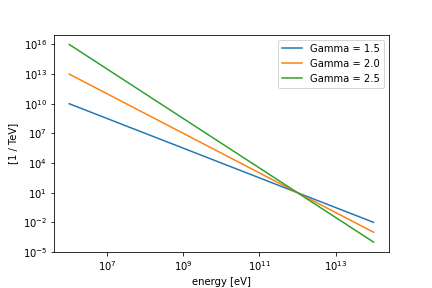

## Cyclotron Frequency

Here are some values fo an example. We will use the geo-magnetic field:

In [ ]:
B = 40 * u.microTesla

The mass of the electron is defined in astropy.constants, we can make use of this:

In [ ]:
c.m_e

The electron has one elementary charge, we do not care about the sign here:

In [ ]:
c.e

Let's put everything together:

In [ ]:
omega = c.e*B/c.m_e

Depending on the system you are using the elementary charge has different values and units. So we have to be specific here. All calculations in this course are in standard units, so let's try this.

In [ ]:
omega = c.e.si *B/c.m_e

In [ ]:
omega

In [ ]:
omega.to(u.MHz)

How many cycles per second? We have to devide by the angle of one full circle, $2\pi$.

In [ ]:
omega/(2*pi)

In [ ]:
(omega/(2*pi)).to(u.MHz)

### Exercise

We will need the cyclotron frequency more often. Please write a function which takes the magnetic field as first parameter, the "atomic number" of the particle (-1 for an electron, +1 for a proton, +2 for a Helium nucleus and so on) as 2nd parameter with -1 as default, and the mass as third parameter with the electron mass as default. Return the cyclotron frequency in Hz. Make sure that it is never negative!

**[3 marks]**

In [ ]:
def CyclotronFrequency (B, Z = -1, m = c.m_e) :
    
    ## fill your code in here:
    omega = 0
    
    return omega

Let's test it:

In [ ]:
CyclotronFrequency (B)

Expected output:

7035280 Hz

## Submission

Before you submit your work you should make a few checks that everything works fine.

1. Save your notebook as a PDF (File->Download As->PDF). This document will help you debugging in the next step.
1. If PDF export does not work: You can do File->Print Preview and then print to a file.
1. Restart the kernel and rerun the entire notebook (Kernel->Restart & Run All). This will delete all variables (but not your code) and rerun the notebook in one go. If this does not go through the endthen you have to fix it. You will see at which cell the run stopped. A common mistake is using a variable that is defined only at a later stage.
1. You think you fixed everything? Redo step 2 (Kernel->Restart & Run All)

You have to download and submit 2 files, the jupyter notebook and a pdf.
- Jupyter notebook. File->Download As->Notebook (.ipynb). Save this file on your disk.
- PDF file. File->Download As->PDF. Save this file on your disk.
- If PDF export does not work. You can do File->Print Preview and then print to a file.

Please submit the two files on Ulwazi.